In [ ]:
##SkimLit
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.


In [ ]:
!ls pubmed-rct

PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
# Start by using the 20k dataset
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os
filenames=[data_dir+filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [ ]:
def get_lines(filename):

  """Returns all the lines in the file as the list"""
  with open(filename, 'r') as f:
    return f.readlines()

In [ ]:
def preprocess_text_with_line_numbers(filename):

  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line

      abstract_id = line
      abstract_lines = "" # reset abstract string


    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines




      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):

        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list

    else:
      abstract_lines += line

  return abstract_samples

In [ ]:
train_samples=preprocess_text_with_line_numbers(data_dir+'train.txt')
test_samples=preprocess_text_with_line_numbers(data_dir+'test.txt')
val_samples=preprocess_text_with_line_numbers(data_dir+'dev.txt')
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [ ]:
train_samples[:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
import pandas as pd
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)
train_df.head(4)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11


In [ ]:
train_df.target.value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


<Axes: ylabel='Frequency'>

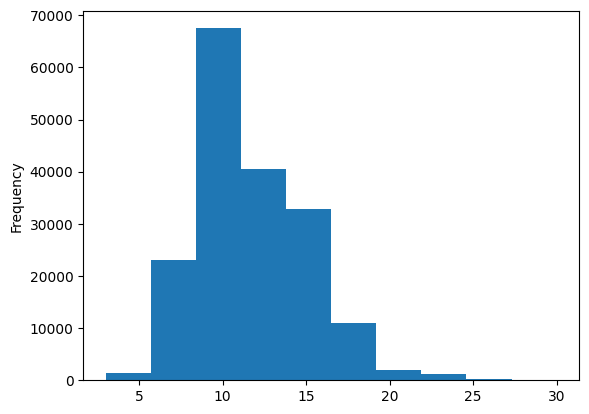

In [ ]:
train_df.total_lines.plot(kind='hist')

In [ ]:
train_sentences=train_df['text'].to_list()
test_sentences=test_df['text'].to_list()
val_sentences=val_df['text'].to_list()
len(train_sentences),len(test_sentences),len(val_sentences)

(180040, 30135, 30212)

In [ ]:
train_df.head(10)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


Make the numric labels(Machine learning models requires labels to be numerical)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False)
train_labels_one_hot=one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot=one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))
val_labels_one_hot=one_hot_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
train_labels_one_hot.shape,test_labels_one_hot.shape,val_labels_one_hot.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((180040, 5), (30135, 5), (30212, 5))

In [ ]:
import tensorflow as tf
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

In [ ]:
len(train_df),len(test_df),len(val_df)

(180040, 30135, 30212)

#Label Encoding
Here you encode labels to integers

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_labels_encoded=label_encoder.fit_transform(train_df['target'].to_numpy())
test_labels_encoded=label_encoder.transform(test_df['target'].to_numpy())
val_labels_encoded=label_encoder.transform(val_df['target'].to_numpy())

In [ ]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
train_labels_encoded.shape

(180040,)

In [ ]:
num_classes=len(label_encoder.classes_)
class_names=label_encoder.classes_
num_classes,class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [ ]:
# Now we will start making the baseline model starting from Naive Bayes (TfIdf Vectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model_0=Pipeline([
    ('tf-idf',TfidfVectorizer()),
    ('clf',MultinomialNB())
])


#While One hot encoding it's gonna give you errors unless you are using upgraded version of sklearn
model_0.fit(train_sentences,train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(val_sentences,val_labels_encoded)

0.7218323844829869

In [ ]:
baseline_preds=model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-09-04 17:39:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-09-04 17:39:44 (72.1 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:

from helper_functions import calculate_results

In [ ]:
baseline_results=calculate_results(val_labels_encoded,
                                   baseline_preds)

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

Now before we start to make deep learning models we need to vectorize and embed our text data


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import TextVectorization

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [ ]:
sent_lens=[len(sentence.split()) for sentence in train_sentences]
av_sent_len=np.mean(sent_lens)
av_sent_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

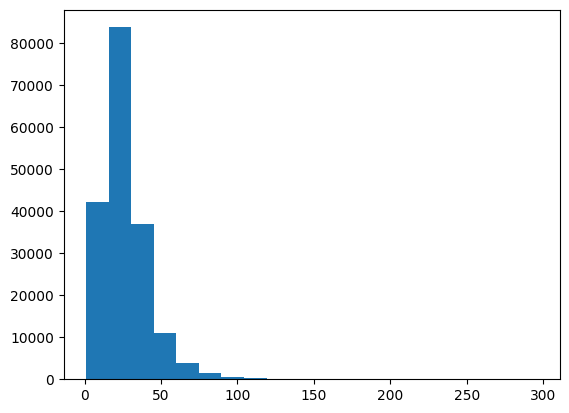

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sent_lens,bins=20)

### How long a sentence carries 95 % of the examples

In [ ]:
output_seq_len=int(np.percentile(sent_lens,95))
output_seq_len

55

In [ ]:
max_tokens=68000

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vectorizer=TextVectorization(max_tokens=max_tokens,
                                  output_sequence_length=output_seq_len)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
target_sentence=random.choice(train_sentences)
print(f"Original Sentence is {target_sentence}")
print(f"Length of text is {len(target_sentence.split())}")
print(f"Vectorized Sentence is {text_vectorizer([target_sentence])}")
print(f"Vectorized Sentence shape is {text_vectorizer([target_sentence]).shape}")

Original Sentence is nonadherence , total crossover ( contamination + nonadherence ) , migration distance , and characteristics were determined .
Length of text is 18
Vectorized Sentence is [[3902   76  484 4284 3902 4881 1167    3  395    9  505    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]
Vectorized Sentence shape is (1, 55)


In [ ]:
rct_20k_text_vocab=text_vectorizer.get_vocabulary()
print(f"Most common words is {rct_20k_text_vocab[:10]}")
print(f"Least common words is {rct_20k_text_vocab[-10:]}")
print(f"Length of rct_20k_text_vocab is {len(rct_20k_text_vocab)}")

Most common words is ['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']
Least common words is ['aarm', 'aaqol', 'aaq', 'aanhui', 'aana', 'aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']
Length of rct_20k_text_vocab is 64841


In [ ]:
text_vectorizer.get_config() # To get the configuration we will use text vectorizer

{'name': 'text_vectorization_2',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [ ]:
from tensorflow.keras import layers

In [ ]:
token_embed=layers.Embedding(input_dim=len(rct_20k_text_vocab), # Take the total number of vocabulary words
                             output_dim=128,
                             mask_zero=True,
                             name='token_embedding')


print(f'Sentence before vectorization: {target_sentence}')
vectorized_sentence=text_vectorizer([target_sentence])
print(f"Sentence after vectorization before embedding is {vectorized_sentence}")
embedded_sentence=token_embed(vectorized_sentence)
print(f"Sentence after embedding is {embedded_sentence}")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization: nonadherence , total crossover ( contamination + nonadherence ) , migration distance , and characteristics were determined .
Sentence after vectorization before embedding is [[3902   76  484 4284 3902 4881 1167    3  395    9  505    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]
Sentence after embedding is [[[-0.01490716 -0.00225381  0.03860306 ... -0.01041307 -0.00036366
    0.02612254]
  [ 0.04900099  0.00141633 -0.036446   ... -0.0163862   0.01163788
    0.00405303]
  [-0.00788631  0.01345192 -0.04828054 ...  0.02392161  0.04997947
   -0.03726133]
  ...
  [ 0.02794493  0.02094677 -0.02198904 ...  0.04225928 -0.0396575
    0.03490155]
  [ 0.02794493  0.02094677 -0.02198904 ...  0.04225928 -0.0396575
    0.03490155]
  [ 0.02794493  0.02094677 -0.02198904 ...  0.04225928 -0.03965

In [ ]:
print(f"Sentence after embedding is {embedded_sentence[0].shape}")

Sentence after embedding is (55, 128)


In [ ]:
# To turn our data into Tensorflow datasets
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_encoded))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_encoded))
val_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_encoded))


In [ ]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
#Convert TensorFlowSliceDataset and turn them into prefetch datasets

train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset=val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
num_classes

5

In [ ]:
inputs=layers.Input(shape=(1,),dtype='string')
text_vectors=text_vectorizer(inputs)
token_embeddings=token_embed(text_vectors)
x=layers.Conv1D(64,activation='relu',kernel_size=5,padding='same')(token_embeddings)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(num_classes,activation='softmax')(x)
model_1=tf.keras.Model(inputs,outputs)
model_1.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
label_encoder.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [ ]:
len(label_encoder.classes_)

5

In [ ]:
model_1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_2                 │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_embedding (Embedding)          │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 55, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,340,997 (31.82 MB)

 Trainable params: 8,340,997 (31.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
val_labels_encoded

array([0, 0, 3, ..., 4, 1, 1])

In [ ]:
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=val_dataset,
                              validation_steps=int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 54s 92ms/step - accuracy: 0.5194 - loss: 1.1642 - val_accuracy: 0.7394 - val_loss: 0.6963
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 49s 87ms/step - accuracy: 0.7422 - loss: 0.6907 - val_accuracy: 0.7603 - val_loss: 0.6435
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 50s 89ms/step - accuracy: 0.7650 - loss: 0.6316 - val_accuracy: 0.7859 - val_loss: 0.5995


In [ ]:
model_1_pred_probs=model_1.predict(val_dataset)
model_1_pred_probs

945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step


array([[4.0897578e-01, 1.7931873e-01, 1.0466436e-01, 2.7503243e-01,
        3.2008596e-02],
       [4.8282397e-01, 2.4814294e-01, 9.8319035e-03, 2.5385660e-01,
        5.3445469e-03],
       [1.6176093e-01, 1.1261865e-02, 2.2695253e-03, 8.2468170e-01,
        2.6022022e-05],
       ...,
       [4.0736941e-06, 9.1824797e-04, 6.0370279e-04, 2.6127968e-06,
        9.9847132e-01],
       [4.8522741e-02, 4.1929916e-01, 1.2670133e-01, 5.3267166e-02,
        3.5220951e-01],
       [1.9545098e-01, 5.8725107e-01, 4.4942316e-02, 6.2610082e-02,
        1.0974554e-01]], dtype=float32)

In [ ]:
model_1_pred_probs.shape

(30212, 5)

In [ ]:
model_1_preds=tf.argmax(model_1_pred_probs,axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
val_labels_encoded.shape

(30212,)

In [ ]:
model_1_results=calculate_results(val_labels_encoded,model_1_preds)
model_1_results

{'accuracy': 78.25367403680656,
 'precision': 0.778871567929202,
 'recall': 0.7825367403680656,
 'f1': 0.7800852831526067}

Feature extractor model with pretrained token embeddings

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
               trainable=False,
               name='Universal_Sentence_Encoder')

In [ ]:
tf_hub_embedding_layer

In [ ]:
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence=tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding is {use_embedded_sentence[0][:30]} truncated output is \n")
print(f"Length of sentence embedding is {len(use_embedded_sentence[0])}")

Random training sentence:
this size-weight illusion presents an obvious risk when lifting large and heavy boxes .

Sentence after embedding is [-0.03718364  0.05971115  0.03833545  0.03825939  0.00831294  0.0008421
 -0.03289712  0.06895082 -0.0142477  -0.01200199  0.05896989 -0.06162474
 -0.018357    0.01266943 -0.00850546 -0.04983993  0.00273259  0.03777866
 -0.01293124  0.07112154  0.06125421  0.06326765  0.02548289 -0.03344152
 -0.01732526  0.05466285 -0.02979412 -0.02707336 -0.05655052 -0.06816394] truncated output is 

Length of sentence embedding is 512


#Now let's use pretrained embedding from tensorflow hub most specifically Universal Sentence Encoder

In [ ]:
import tf_keras
from tf_keras import layers
# from tensorflow.keras import layers

In [ ]:
inputs=layers.Input(shape=[],dtype='string')
print(type(inputs))
pretrained_embedding=tf_hub_embedding_layer(inputs)
x=layers.Dense(128,activation='relu')(pretrained_embedding)
outputs=layers.Dense(5,activation='softmax')(x)
model_2=tf_keras.Model(inputs,outputs)
model_2.compile(loss='sparse_categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

<class 'tf_keras.src.engine.keras_tensor.KerasTensor'>


In [ ]:
print(tf.string)

<dtype: 'string'>


In [ ]:
print("string")

string


In [ ]:

model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 Universal_Sentence_Encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
tf.__version__

'2.17.0'

In [ ]:
model_2_history=model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=3,
            validation_data=val_dataset,
            validation_steps=int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 12s 15ms/step - loss: 0.9202 - accuracy: 0.6493 - val_loss: 0.7990 - val_accuracy: 0.6888
Epoch 2/3
562/562 [==============================] - 10s 18ms/step - loss: 0.7712 - accuracy: 0.7012 - val_loss: 0.7583 - val_accuracy: 0.7041
Epoch 3/3
562/562 [==============================] - 10s 17ms/step - loss: 0.7544 - accuracy: 0.7126 - val_loss: 0.7408 - val_accuracy: 0.7111


In [ ]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 14s 15ms/step - loss: 0.7426 - accuracy: 0.7133


[0.7426052689552307, 0.7132927179336548]

In [ ]:
model_2_pred_probs=model_2.predict(val_dataset)
model_2_pred_probs

945/945 [==============================] - 13s 13ms/step


array([[4.2837808e-01, 3.7848321e-01, 2.7478584e-03, 1.8048742e-01,
        9.9034291e-03],
       [3.6301333e-01, 4.6872681e-01, 3.6197384e-03, 1.6057812e-01,
        4.0619932e-03],
       [2.2817093e-01, 1.5974247e-01, 1.6552284e-02, 5.5535543e-01,
        4.0178914e-02],
       ...,
       [1.6691942e-03, 6.0758605e-03, 5.2155230e-02, 8.0492417e-04,
        9.3929482e-01],
       [3.5027978e-03, 4.5966312e-02, 1.8076128e-01, 1.4249097e-03,
        7.6834476e-01],
       [1.8936761e-01, 2.7364504e-01, 4.6238524e-01, 7.0477999e-03,
        6.7554235e-02]], dtype=float32)

In [ ]:
model_2_preds=tf.argmax(model_2_pred_probs,axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results=calculate_results(val_labels_encoded,
                                  model_2_preds)
model_2_results

{'accuracy': 71.32927313650205,
 'precision': 0.7135244629121287,
 'recall': 0.7132927313650205,
 'f1': 0.7101309961303717}

In [ ]:
len(train_dataset)*3.2

18006.4

In [ ]:
len(train_sentences)

180040

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [ ]:
 " ".join(list(train_sentences[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
def split_chars(text):
  return " ".join(list(text))

In [ ]:
print(split_chars(train_sentences[0]))

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [ ]:
split_chars(target_sentence)

'n o n a d h e r e n c e   ,   t o t a l   c r o s s o v e r   (   c o n t a m i n a t i o n   +   n o n a d h e r e n c e   )   ,   m i g r a t i o n   d i s t a n c e   ,   a n d   c h a r a c t e r i s t i c s   w e r e   d e t e r m i n e d   .'

In [ ]:
train_chars=[split_chars(sentence) for sentence in train_sentences]
val_chars=[split_chars(sentence) for sentence in val_sentences]
test_chars=[split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [ ]:
char_lens=[len(sentence) for sentence in train_sentences]
mean_char_len=np.mean(char_lens)
mean_char_len

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

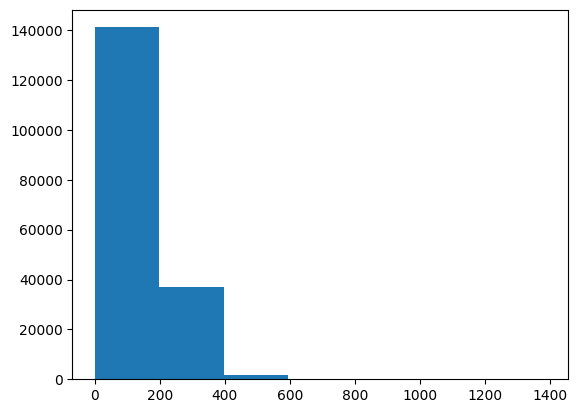

In [ ]:
import matplotlib.pyplot as plt
plt.hist(char_lens,bins=7)

In [ ]:

output_seq_len=int(np.percentile(char_lens,95))
output_seq_len

290

In [ ]:
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
alphabet


'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from tf_keras.layers import TextVectorization

In [ ]:
NUM_CHAR_TOKENS=len(alphabet)+2
char_vectorizer=TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                  standardize='lower_and_strip_punctuation',  # Keep standardization to None if you want to keep punctuation in
                                  output_mode='int',
                                  output_sequence_length=output_seq_len)

char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab=char_vectorizer.get_vocabulary()
print("Number of different characters in vocabulary is {len(char_vocab)}")
print(f"5 most common words: {char_vocab[:5]}")
print(f"5 least common words: {char_vocab[-5:]}")


Number of different characters in vocabulary is {len(char_vocab)}
5 most common words: ['', '[UNK]', 'e', 't', 'i']
5 least common words: ['k', 'x', 'z', 'q', 'j']


In [ ]:


random_train_chars=random.choice(train_chars)
print(f"Clarified Text is \n{random_train_chars}")
print(f"\nLength of characters is {len(random_train_chars.split())}")
vectorized_chars=char_vectorizer([random_train_chars])
print(f"Vectorized Chars is {vectorized_chars}")
print(f"Vectorized chars shape is {len(vectorized_chars[0])}")

Clarified Text is 
b a s e l i n e   v a l u e s   w e r e   s i m i l a r   f o r   m e d i a n   w e i g h t   (   @   k g   )   ,   m e d i a n   b m i   (   @   k g / m   )   ,   a n d   t h e   p r o p o r t i o n   o f   w o m e n   w i t h   s e x u a l   d y s f u n c t i o n   (   @   %   )   .

Length of characters is 112
Vectorized Chars is [[22  5  9  2 12  4  6  2 21  5 12 16  2  9 20  2  8  2  9  4 15  4 12  5
   8 17  7  8 15  2 10  4  5  6 20  2  4 18 13  3 23 18 15  2 10  4  5  6
  22 15  4 23 18 15  5  6 10  3 13  2 14  8  7 14  7  8  3  4  7  6  7 17
  20  7 15  2  6 20  4  3 13  9  2 24 16  5 12 10 19  9 17 16  6 11  3  4
   7  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [ ]:
char_embed=layers.Embedding(input_dim=NUM_CHAR_TOKENS,
                            output_dim=25,
                            mask_zero=False,
                            name='char_embed')

print(f"Classified text is {random_train_chars}")
print(f"After embeding and vectorization: {char_embed(char_vectorizer([random_train_chars]))}")
print(f"After embeding and vectorization shape: {char_embed(char_vectorizer([random_train_chars])).shape}")

Classified text is b a s e l i n e   v a l u e s   w e r e   s i m i l a r   f o r   m e d i a n   w e i g h t   (   @   k g   )   ,   m e d i a n   b m i   (   @   k g / m   )   ,   a n d   t h e   p r o p o r t i o n   o f   w o m e n   w i t h   s e x u a l   d y s f u n c t i o n   (   @   %   )   .
After embeding and vectorization: [[[-0.01755685  0.03934104 -0.03507354 ... -0.01452918  0.00466909
    0.03422228]
  [ 0.03292456 -0.00196518  0.01970302 ...  0.01665339 -0.0366324
   -0.0404047 ]
  [-0.02078638 -0.04057152  0.04089611 ...  0.02592546  0.04366081
   -0.00718985]
  ...
  [-0.03308984 -0.04621821 -0.02364221 ...  0.04020767  0.02991914
   -0.03021951]
  [-0.03308984 -0.04621821 -0.02364221 ...  0.04020767  0.02991914
   -0.03021951]
  [-0.03308984 -0.04621821 -0.02364221 ...  0.04020767  0.02991914
   -0.03021951]]]
After embeding and vectorization shape: (1, 290, 25)


In [ ]:
import tf_keras
from tensorflow.keras import layers

In [ ]:
# Make Conv1D on chars only
inputs = layers.Input(shape=[], dtype=tf.string)
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_3_conv1D_char_embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_3                 │ (None, 290)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ char_embed (Embedding)               │ (None, 290, 25)             │           1,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 290, 64)             │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,139 (39.61 KB)

 Trainable params: 10,139 (39.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_chars[0]

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
model_3_history=model_3.fit(train_char_dataset,
                            validation_data=val_char_dataset,
                                epochs=3,
                            steps_per_epoch=int(0.1*len(train_char_dataset)),
                            validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.4274 - loss: 1.4098 - val_accuracy: 0.5841 - val_loss: 1.0555
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.5892 - loss: 1.0304 - val_accuracy: 0.6320 - val_loss: 0.9465
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.6363 - loss: 0.9273 - val_accuracy: 0.6676 - val_loss: 0.8734


In [ ]:
model_3.evaluate(val_char_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6653 - loss: 0.8692


[0.8745482563972473, 0.6647358536720276]

In [ ]:
model_3_pred_probs=model_3.predict(val_char_dataset)
model_3_pred_probs.shape

945/945 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


(30212, 5)

In [ ]:
model_3_pred=tf.argmax(model_3_pred_probs,axis=1)
model_3_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 3, 3, 2, 2, 2, 2, 0, 4, 1])>

In [ ]:
model_3_results=calculate_results(val_labels_encoded,
                                  model_3_pred)
model_3_results

{'accuracy': 66.47358665430954,
 'precision': 0.6600091922981893,
 'recall': 0.6647358665430955,
 'f1': 0.6552423965668046}

In [ ]:
model_3.summary()

Model: "model_3_conv1D_char_embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_3                 │ (None, 290)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ char_embed (Embedding)               │ (None, 290, 25)             │           1,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 290, 64)             │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,419 (118.83 KB)

 Trainable params: 10,139 (39.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,280 (79.22 KB)

#Building a Conv1D model to fit on character embeddings

In [ ]:
tf_hub_embedding_layer

In [ ]:
import tf_keras
# from tensorflow.keras import layers
from tf_keras import layers

In [ ]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf_keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf_keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])



# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)



# 5. Construct model with char and token inputs
model_4 = tf_keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 text_vectorization (TextVe  (None, 290)                  0         ['char_input[0][0]']          
 ctorization)                                                                                     
                                                                                                  
 Universal_Sentence_Encoder  (None, 512)                  2567978 

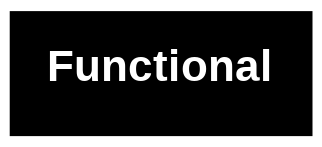

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4)


In [ ]:
model_4.compile(loss='categorical_crossentropy',
                optimizer="Adam",
                metrics=['accuracy'])

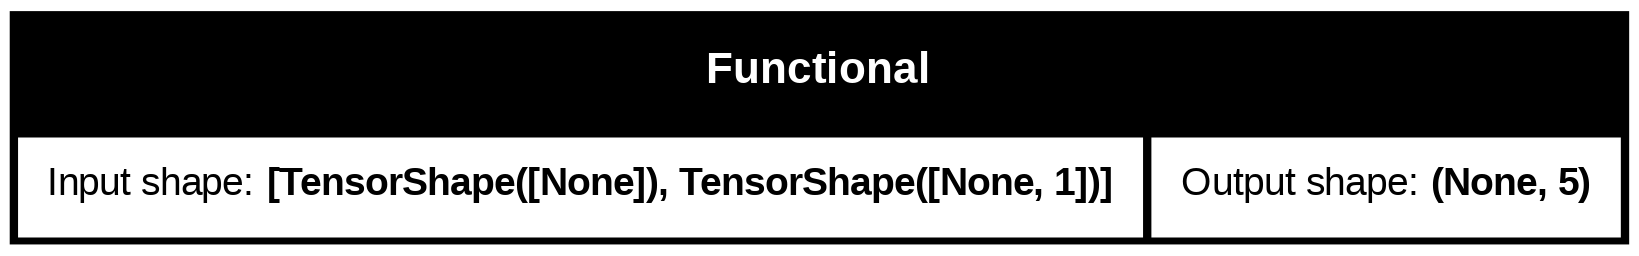

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4,show_shapes=True)

In [ ]:
train_char_token_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_char_token_labels =tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset=tf.data.Dataset.zip((train_char_token_data,train_char_token_labels))

train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_data =tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_char_token_labels =tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset =tf.data.Dataset.zip((val_char_token_data,val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_dataset,val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
model_4_history=model_4.fit(train_char_token_dataset,
                            validation_data=val_char_token_dataset,
                            epochs=3,
                            steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                            validation_steps=int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 134s 228ms/step - loss: 0.9714 - accuracy: 0.6123 - val_loss: 0.7748 - val_accuracy: 0.7011
Epoch 2/3
562/562 [==============================] - 125s 222ms/step - loss: 0.7982 - accuracy: 0.6937 - val_loss: 0.7190 - val_accuracy: 0.7257
Epoch 3/3
562/562 [==============================] - 130s 231ms/step - loss: 0.7686 - accuracy: 0.7058 - val_loss: 0.7010 - val_accuracy: 0.7374


In [ ]:
# Evaluate on the whole validation dataset
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 54s 58ms/step - loss: 0.7040 - accuracy: 0.7327


[0.7039539217948914, 0.7327221035957336]

In [ ]:
model_4_pred_probs=model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 57s 58ms/step


array([[4.6903378e-01, 3.0729041e-01, 3.5684791e-03, 2.1084560e-01,
        9.2617031e-03],
       [4.1784269e-01, 2.9127780e-01, 3.2315981e-03, 2.8567025e-01,
        1.9776728e-03],
       [2.6739290e-01, 9.5558397e-02, 2.7447551e-02, 5.8250505e-01,
        2.7096111e-02],
       ...,
       [7.3486910e-04, 9.5949899e-03, 5.5865072e-02, 2.7724716e-04,
        9.3352783e-01],
       [8.3707925e-03, 6.9424771e-02, 1.6298667e-01, 3.4504603e-03,
        7.5576735e-01],
       [3.7205127e-01, 3.6136022e-01, 1.8071261e-01, 2.9954404e-02,
        5.5921409e-02]], dtype=float32)

In [ ]:
model_4_preds=tf.argmax(model_4_pred_probs,axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 0])>

In [ ]:
model_4_results=calculate_results(val_labels_encoded,
                                  model_4_preds)

In [ ]:
model_4_results

{'accuracy': 73.27220971799285,
 'precision': 0.7327104590206027,
 'recall': 0.7327220971799285,
 'f1': 0.7315014175988215}

In [ ]:
model_1_results

{'accuracy': 78.25367403680656,
 'precision': 0.778871567929202,
 'recall': 0.7825367403680656,
 'f1': 0.7800852831526067}

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


## Positional Embeddings + Token Embeddings + Character Embeddings

#Any engineered features used to train a model needs to be available at test time

In [ ]:
train_df['line_number'].value_counts()

,count
line_number,
0,15000
1,15000
2,15000
3,15000
4,14992
5,14949
6,14758
7,14279
8,13346


<Axes: ylabel='Frequency'>

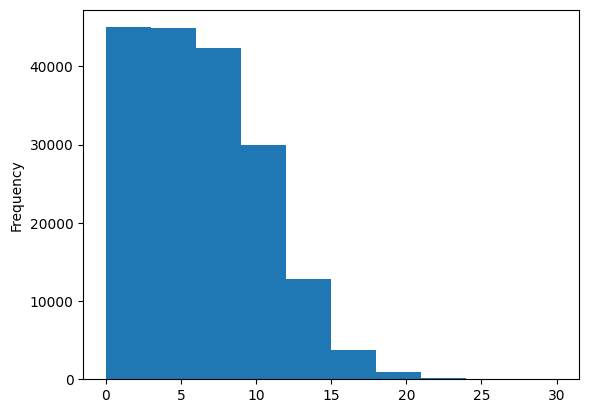

In [ ]:
train_df['line_number'].plot.hist()

<Axes: ylabel='Frequency'>

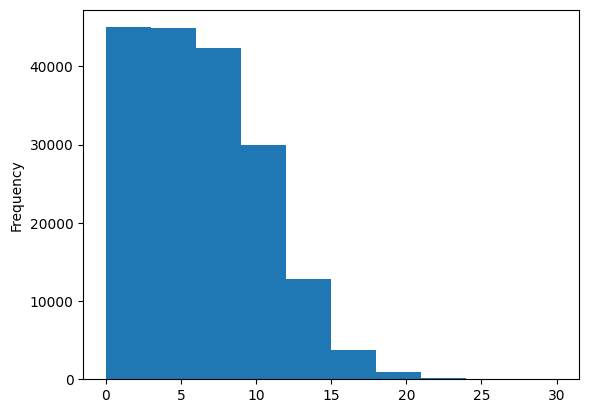

In [ ]:
train_df.line_number.plot.hist()

<Axes: ylabel='Frequency'>

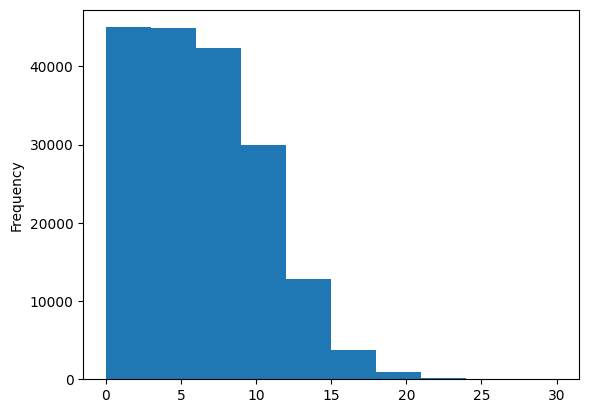

In [ ]:
train_df.line_number.plot.hist()

In [ ]:
len(train_sentences)

180040

In [ ]:
train_line_numbers_one_hot=tf.one_hot(train_df['line_number'].to_numpy(),depth=15)
test_line_numbers_one_hot=tf.one_hot(test_df['line_number'].to_numpy(),depth=15)
val_line_numbers_one_hot=tf.one_hot(val_df['line_number'].to_numpy(),depth=15)
train_line_numbers_one_hot[:15],train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(15, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.

In [ ]:
val_df.shape

(30212, 4)

In [ ]:
train_df.head(1)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11


In [ ]:
train_df.total_lines.value_counts()

,count
total_lines,
11,24468
10,23639
12,22113
9,19400
13,18438
14,14610
8,12285
15,10768
7,7464


<Axes: ylabel='Frequency'>

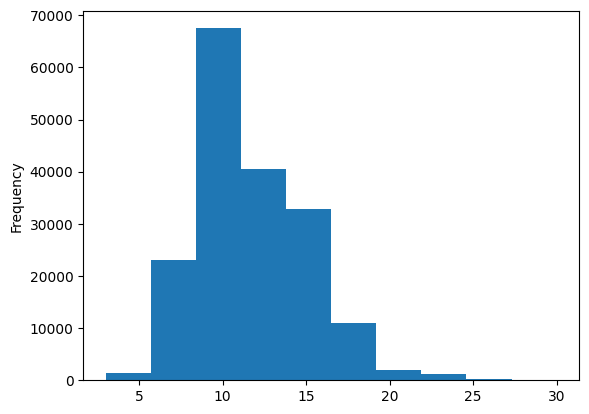

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
np.percentile(train_df.total_lines,98)

20.0

In [ ]:
np.percentile(train_df.total_lines,99)

21.0

In [ ]:
train_total_lines_one_hot=tf.one_hot(train_df.total_lines.to_numpy(),depth=20)
test_total_lines_one_hot=tf.one_hot(test_df.total_lines.to_numpy(),depth=20)
val_total_lines_one_hot=tf.one_hot(val_df.total_lines.to_numpy(),depth=20)

train_total_lines_one_hot,train_total_lines_one_hot.shape

(<tf.Tensor: shape=(180040, 20), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 TensorShape([180040, 20]))

In [ ]:
train_total_lines_one_hot[0].shap

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:

##Our Tribrid embedding model


In [ ]:
train_line_numbers_one_hot[0].dtype

tf.float32

In [ ]:
import tf_keras
from tf_keras import layers

In [ ]:

#Created the token embedding first

token_inputs=layers.Input(shape=[],dtype='string',name='token_input')
token_embeddings=tf_hub_embedding_layer(token_inputs)
token_output=layers.Dense(128,activation='relu')(token_embeddings)
token_model=tf_keras.Model(inputs=token_inputs,
                           outputs=token_output)

#Created the character embedding secondly
char_inputs=layers.Input(shape=(1,),dtype='string',name='char_inputs ')
char_vectors=char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model=tf_keras.Model(inputs=char_inputs,
                          outputs=char_bi_lstm)


#Creating the line number embedding
line_number_inputs=layers.Input(shape=(15,),dtype='float32',name='line_number_inputs')
x=layers.Dense(32,activation='relu')(line_number_inputs)
line_number_model=tf_keras.Model(inputs=line_number_inputs,
                      outputs=x)


#Creating the total line embedding
total_line_inputs=layers.Input(shape=(20,),dtype='float32',name='total_line_inputs')
y=layers.Dense(32,activation='relu')(total_line_inputs)
total_line_model=tf_keras.Model(inputs=total_line_inputs,
                                outputs=y)



#Combine token and char embeddings into a hybrid embeddings
combined_embeddings=tf_keras.layers.Concatenate(name='char_token_hybrid_embeddings')([token_model.output,
                                                                                     char_model.output])


#Now adding a dropout layers
z=layers.Dense(256,activation='relu')(combined_embeddings)
z=layers.Dropout(0.5)(z)


#Now making a trihybrid model embeddings
tribrid_embeddings=tf_keras.layers.Concatenate(name='tribid_embeddings')([line_number_model.output,
                                                                        total_line_model.output,
                                                                         z])

#Create an output layer
output_layer=layers.Dense(5,activation='softmax',name='output_layer')(tribrid_embeddings)


#Putting together model with all inputs
model_5=tf_keras.Model(inputs=[line_number_model.input,
                               total_line_model.input,
                               token_model.input,
                               char_model.input],
                       outputs=output_layer,name='tribrid_embedding_model')


model_5.summary()

Model: "tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs  (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 text_vectorization (TextVe  (None, 290)                  0         ['char_inputs [0][0]']        
 ctorization)                                                                                     
                                                                                                  
 Universal_Sentence_Encoder  (None, 512)                  2567978   ['token_

In [ ]:
model_5.compile(loss=tf_keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf_keras.optimizers.Adam(),
                metrics=['accuracy'])


###Label Smoothing- It relaxes the confidence on main labels to other options. For more info you can look at PyImageSearch

'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .'

In [ ]:
##Creating the tribid datasets using tf.data
train_char_token_pos_data=tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                              train_total_lines_one_hot,
                                                              train_sentences,
                                                              train_chars))

train_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)

train_char_token_pos_dataset=tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_labels))
train_char_token_pos_dataset=train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_pos_data=tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))

val_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)

val_char_token_pos_dataset=tf.data.Dataset.zip((val_char_token_pos_data,val_char_token_pos_labels))
val_char_token_pos_dataset=val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
history_model_5=model_5.fit(train_char_token_pos_dataset,
            validation_data=val_char_token_pos_dataset,
            epochs=3,
            steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
            validation_steps=int(0.1*len(val_char_token_pos_dataset)))


Epoch 1/3
562/562 [==============================] - 139s 235ms/step - loss: 1.0966 - accuracy: 0.7240 - val_loss: 0.9881 - val_accuracy: 0.8019
Epoch 2/3
562/562 [==============================] - 126s 224ms/step - loss: 0.9691 - accuracy: 0.8140 - val_loss: 0.9523 - val_accuracy: 0.8251
Epoch 3/3
562/562 [==============================] - 128s 228ms/step - loss: 0.9516 - accuracy: 0.8241 - val_loss: 0.9411 - val_accuracy: 0.8238


In [ ]:
 model_5.evaluate(val_char_token_pos_dataset)

945/945 [==============================] - 56s 59ms/step - loss: 0.9376 - accuracy: 0.8318


[0.9375958442687988, 0.8317555785179138]

In [ ]:
model_5_pred_probs=model_5.predict(val_char_token_pos_dataset)
model_5_pred_probs

945/945 [==============================] - 57s 60ms/step


array([[0.49019527, 0.1187691 , 0.01193856, 0.35797346, 0.02112361],
       [0.515432  , 0.11285493, 0.0566718 , 0.30159166, 0.01344959],
       [0.2823472 , 0.12623973, 0.1657375 , 0.34924898, 0.07642645],
       ...,
       [0.0348315 , 0.10229472, 0.04080559, 0.03156251, 0.79050565],
       [0.03183573, 0.26829267, 0.10364699, 0.02714857, 0.56907606],
       [0.26714617, 0.5719807 , 0.06735739, 0.0401461 , 0.05336968]],
      dtype=float32)

In [ ]:
model_5_preds=tf.argmax(model_5_pred_probs,axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_5.summary()

Model: "tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs  (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 text_vectorization (TextVe  (None, 290)                  0         ['char_inputs [0][0]']        
 ctorization)                                                                                     
                                                                                                  
 Universal_Sentence_Encoder  (None, 512)                  2567978   ['token_

In [ ]:
len(train_char_token_pos_dataset)

5627

In [ ]:
model_5_results=calculate_results(val_labels_encoded,
                                  model_5_preds)

In [ ]:
model_5_results

{'accuracy': 83.17555938037866,
 'precision': 0.8308457324590467,
 'recall': 0.8317555938037866,
 'f1': 0.8302688128620169}

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,78.253674,0.778872,0.782537,0.780085
pretrained_token_embed,71.329273,0.713524,0.713293,0.710131
custom_char_embed_conv1d,66.473587,0.660009,0.664736,0.655242
hybrid_char_token_embed,73.272210,0.732710,0.732722,0.731501
tribrid_pos_char_token_embed,83.175559,0.830846,0.831756,0.830269


In [ ]:
all_model_results['accuracy']=all_model_results['accuracy']/100

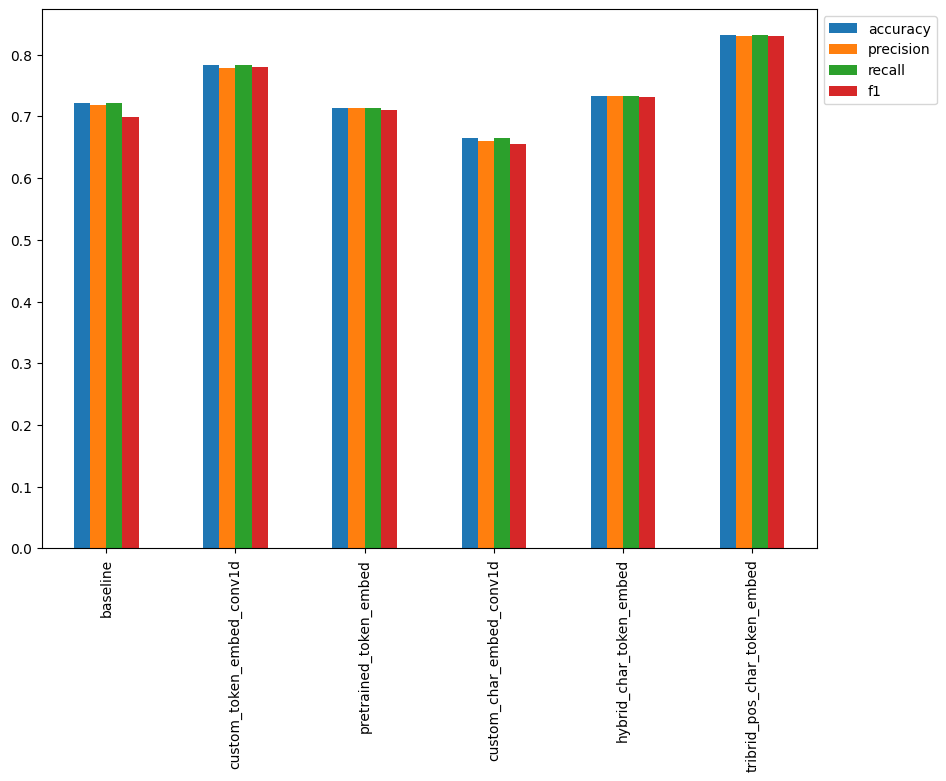

In [ ]:
all_model_results.plot(kind='bar',figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))


<Axes: >

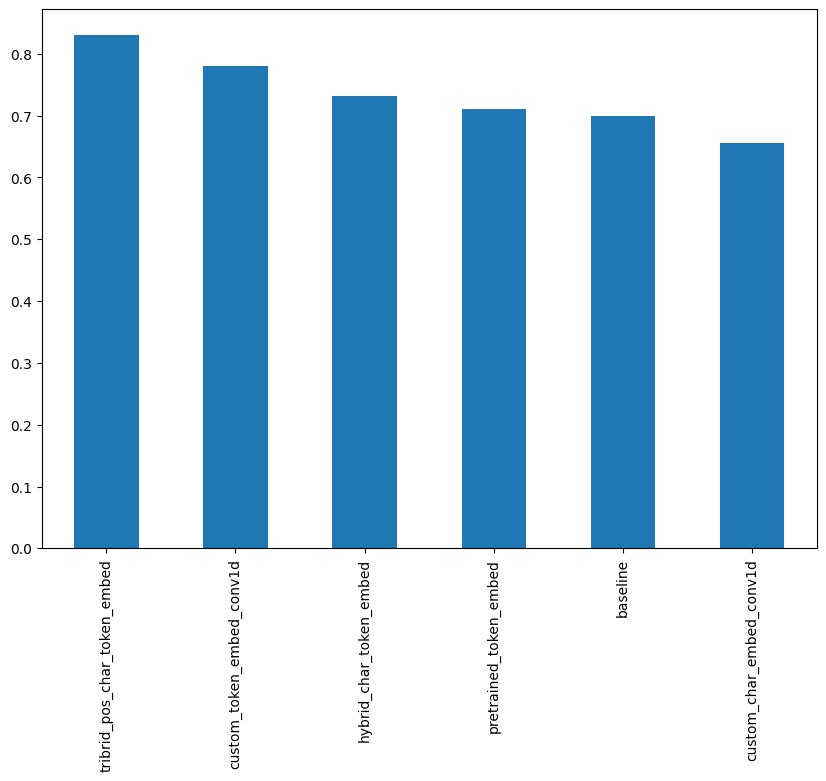

In [ ]:
all_model_results.sort_values('f1',ascending=False)['f1'].plot(kind='bar',figsize=(10,7))

In [ ]:
all_model_results=all_model_results.transpose()
all_model_results

,baseline,custom_token_embed_conv1d,pretrained_token_embed,custom_char_embed_conv1d,hybrid_char_token_embed,tribrid_pos_char_token_embed
accuracy,0.721832,0.782537,0.713293,0.664736,0.732722,0.831756
precision,0.718647,0.778872,0.713524,0.660009,0.732710,0.830846
recall,0.721832,0.782537,0.713293,0.664736,0.732722,0.831756
f1,0.698925,0.780085,0.710131,0.655242,0.731501,0.830269


###Save and Load the Model

In [ ]:
tf.saved_model.save(model_5,'skimlit_tribrid_model')

ValueError: Got non-flat/non-unique argument names for SavedModel signature 'serving_default': more than one argument to '__inference_signature_wrapper_319451' was named 'char_inputs '. Signatures have one Tensor per named input, so to have predictable names Python functions used to generate these signatures should avoid *args and Tensors in nested structures unless unique names are specified for each. Use tf.TensorSpec(..., name=...) to provide a name for a Tensor input.